#Notebook description

This notebook explores Slotine's paper on contraction analysis

# Review

Slotine analyzes nonlinear systems of the form

$$\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},t)$$

and examines virtual (differential) displacements $\delta\mathbf{x}$, and the squared displacement

$$\delta\mathbf{x}^T\delta\mathbf{x}$$

He says that 

$$\delta\dot{\mathbf{x}}=\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x}$$

so that

\begin{align}
\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) &= 2\delta\mathbf{x}^T\delta\dot{\mathbf{x}} \\
 &= 2\delta\mathbf{x}^T\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x} \\
\end{align}

Only the symmetric part of $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ affects the quadratic form ([proof](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/theory/linear_algebra.ipynb#Only-symmetric-matrices-affect-the-quadratic-form
)). Using linear algebra,

$$
\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le 2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x}
$$

where $\lambda_{max}$ is the maximum eigenvalue of the symmetric part of $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$. Starting with $\delta\mathbf{x}_0$, we'll then have

$$
\|\delta\mathbf{x}\| \le \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt}
$$

Actually, using linear algebra we make the stronger statement that

\begin{align}
2\lambda_{min}\delta\mathbf{x}^T\delta\mathbf{x} \le& \frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le
    2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x} \\
\|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt} \le& \|\delta\mathbf{x}\| \le
    \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt} \\
\end{align}

# Testing
Here we'll look at the linear case of 

$$\mathbf{f}(\mathbf{x}, t)=A\mathbf{x}$$

so that

$$\frac{\partial\mathbf{f}}{\partial\mathbf{x}} = A$$

We will test three claims:
- $\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) = 
     2\delta\mathbf{x}^T\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x}$


 - $2\lambda_{min}\delta\mathbf{x}^T\delta\mathbf{x} \le \frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le
    2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x} $


 - $\|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{min}(\mathbf{x},t)dt} \le \|\delta\mathbf{x}\| \le
    \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt}$

We will run the system using two trajectories, $x$ and $y$, defined by their initial conditions.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from utils.contraction import sim_sys, phase, plot_contraction

[[-1.5  0.5]
 [ 0.5 -1.5]]


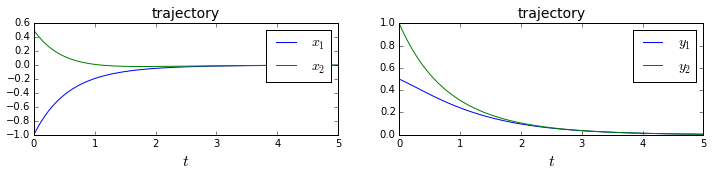

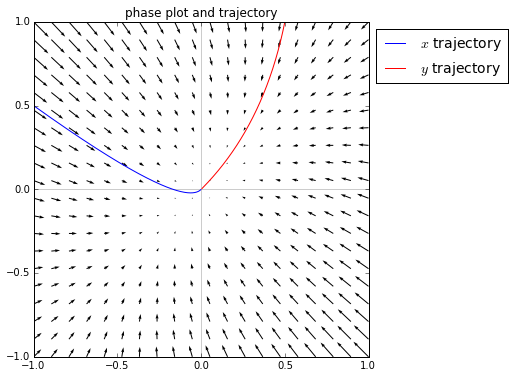

In [3]:
P = np.array([
    [1,-1],
    [1,1]], dtype=float)
P /= np.sqrt(2.)
lam = np.diag([-1, -2])
A = P.dot(lam).dot(P.T)

dt = 1e-4
T = 5.
N = int(np.ceil(T/dt))
t = np.arange(N)*dt
x0 = np.array([-1., .5])
x = sim_sys(A, dt, x0, N)
y0 = np.array([.5, 1.])
y = sim_sys(A, dt, y0, N)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,2))
ax1.plot(t, x[:,0], label=r'$x_1$')
ax1.plot(t, x[:,1], label=r'$x_2$')
ax1.legend(loc='upper right', fontsize=14)
ax1.set_xlabel(r'$t$', fontsize=16)
ax1.set_title('trajectory', fontsize=14)
ax2.plot(t, y[:,0], label=r'$y_1$')
ax2.plot(t, y[:,1], label=r'$y_2$')
ax2.legend(loc='upper right', fontsize=14)
ax2.set_xlabel(r'$t$', fontsize=16)
ax2.set_title('trajectory', fontsize=14)

fig, ax = phase(A, x1lim=(-1, 1), x2lim=(-1, 1), n1=20, n2=20)
ax.plot(x[:,0], x[:,1], 'b', label=r'$x$ trajectory')
ax.plot(y[:,0], y[:,1], 'r', label=r'$y$ trajectory')
ax.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
ax.set_title('phase plot and trajectory')
print A

First, we compare the trajectory of $x$ to the trajectory of $\mathbf{0}$. Here, $\delta\mathbf{x}(t)=x(t)$.

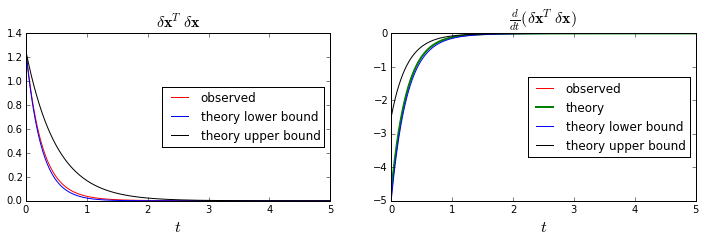

In [4]:
plot_contraction(x, A, dt) # x contraction to 0

The theoretical bounds seem to hold and the observed time derivative matches the numerical time derivative.

Next, we compare the trajectory of $y$ to the trajectory of $x$. Here, $\delta\mathbf{x}(t)=y(t)-x(t)$.

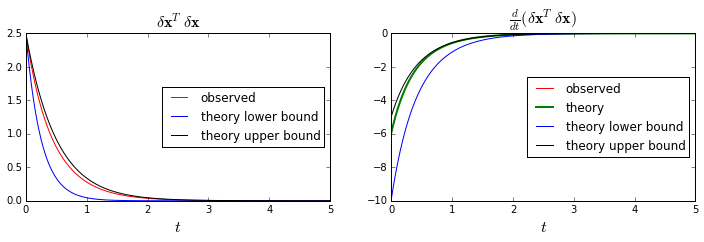

In [5]:
plot_contraction(y-x, A, dt) # y contracting to x

Again, the theoretical bounds seem to hold and the observed time derivative matches the numerical time derivative.